In [1]:
!pip install tensorflow==2.9.0
!pip install ampligraph

Загрузим датасет и отобразим первые 5 строчек

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/sample_data/output.csv", delimiter=';', encoding='cp1251')
data.head()

,кухня,аминокислоты,антиоксиданты,биотин,витамин_а,витамин_в1,витамин_в12,витамин_в2,витамин_в3,витамин_в6,...,натрий,омега-3,различные_антиоксиданты_и_минералы,селен,углеводы,фолат,фолиевая_кислота,фосфор,холин,цинк
0,african,0.0,0.0,0.0,0.666667,0.333333,0.666667,0.0,0.0,0.0,...,0.0,0.333333,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.666667
1,russian,0.0,0.5,0.0,1.000000,0.500000,0.500000,1.0,0.5,0.5,...,0.0,0.000000,0.0,0.0,0.5,0.500000,1.0,0.000000,0.5,0.000000
2,american,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,1.000000,0.0,0.000000
3,itlaian,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000
4,itlaian,0.0,0.0,0.0,0.500000,0.000000,0.500000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


Посмотрим на статистику

In [3]:
data.describe()

,аминокислоты,антиоксиданты,биотин,витамин_а,витамин_в1,витамин_в12,витамин_в2,витамин_в3,витамин_в6,витамин_в9,...,натрий,омега-3,различные_антиоксиданты_и_минералы,селен,углеводы,фолат,фолиевая_кислота,фосфор,холин,цинк
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,...,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,0.002381,0.044643,0.045119,0.549325,0.264960,0.351548,0.250675,0.253571,0.355595,0.003571,...,0.004563,0.035317,0.089087,0.055159,0.153175,0.190556,0.296865,0.121786,0.067937,0.072222
std,0.048795,0.172840,0.127031,0.403527,0.340341,0.369688,0.353889,0.333016,0.385149,0.038456,...,0.043035,0.149945,0.248470,0.173488,0.261281,0.258239,0.315865,0.257720,0.170142,0.194415
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.500000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.500000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,...,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Обработка отсутствующих значений**

In [4]:
print(data.isnull().sum())

кухня                                 0
аминокислоты                          0
антиоксиданты                         0
биотин                                0
витамин_а                             0
витамин_в1                            0
витамин_в12                           0
витамин_в2                            0
витамин_в3                            0
витамин_в6                            0
витамин_в9                            0
витамин_д                             0
витамин_е                             0
витамин_к                             0
витамин_с                             0
железо                                0
жирные_кислоты                        0
йод                                   0
калий                                 0
кальций                               0
капсаицин                             0
кверцетин                             0
клетчатка                             0
магний                                0
марганец                              0


Получается, что датасет полностью заполнен, не нужно никак заполнять пропуски, ибо их просто нет.

Трансформируем csv в triples

In [4]:
triples = []

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    cuisine = row['кухня']

    # For each vitamin column, create a triple
    for vitamin in data.columns[1:]:  # Skip the first column which is 'cuisine'
        value = row[vitamin]
        triples.append((cuisine, vitamin, value))
triples[:10]

[('african', 'аминокислоты', 0.0),
 ('african', 'антиоксиданты', 0.0),
 ('african', 'биотин', 0.0),
 ('african', 'витамин_а', 0.6666666666666666),
 ('african', 'витамин_в1', 0.3333333333333333),
 ('african', 'витамин_в12', 0.6666666666666666),
 ('african', 'витамин_в2', 0.0),
 ('african', 'витамин_в3', 0.0),
 ('african', 'витамин_в6', 0.0),
 ('african', 'витамин_в9', 0.0)]

In [6]:
from ampligraph.evaluation import train_test_split_no_unseen
X_train, X_valid = train_test_split_no_unseen(np.array(triples), test_size=80)
X_train

array([['russian', 'омега-3', '0.0'],
       ['french', 'витамин_в1', '0.5'],
       ['african', 'клетчатка', '0.0'],
       ...,
       ['russian', 'витамин_е', '0.3333333333333333'],
       ['american', 'жирные_кислоты', '0.0'],
       ['russian', 'аминокислоты', '0.0']], dtype='<U34')

In [8]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel
from ampligraph.latent_features.loss_functions import get as get_loss
from ampligraph.latent_features.regularizers import get as get_regularizer
import tensorflow as tf
model = ScoringBasedEmbeddingModel(k=7,
                                   eta=2,
                                   scoring_type='ComplEx',
                                   seed=0)

# Optimizer, loss and regularizer definition
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss = get_loss('multiclass_nll')
regularizer = get_regularizer('LP', {'p': 3, 'lambda': 1e-5})

# Compilation of the model
model.compile(optimizer=optimizer, loss=loss, entity_relation_regularizer=regularizer)

In [9]:
model.fit(X_train,
          batch_size=int(X_train.shape[0] / 50),
          epochs=300
          )

Epoch 1/300
52/52 [==============================] - 3s 48ms/step - loss: 313.7452
Epoch 2/300
52/52 [==============================] - 0s 3ms/step - loss: 311.7357
Epoch 3/300
52/52 [==============================] - 0s 3ms/step - loss: 308.2241
Epoch 4/300
52/52 [==============================] - 0s 3ms/step - loss: 301.6073
Epoch 5/300
52/52 [==============================] - 0s 3ms/step - loss: 291.1141
Epoch 6/300
52/52 [==============================] - 0s 3ms/step - loss: 277.5130
Epoch 7/300
52/52 [==============================] - 0s 3ms/step - loss: 262.5060
Epoch 8/300
52/52 [==============================] - 0s 3ms/step - loss: 247.8177
Epoch 9/300
52/52 [==============================] - 0s 4ms/step - loss: 234.5334
Epoch 10/300
52/52 [==============================] - 0s 3ms/step - loss: 222.7623
Epoch 11/300
52/52 [==============================] - 0s 5ms/step - loss: 212.3441
Epoch 12/300
52/52 [==============================] - 0s 5ms/step - loss: 203.0707
Epoch 13/300

In [14]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

ranks = model.evaluate(X_valid,
                      use_filter={'train': X_train,
                                  'test': X_valid},
                      corrupt_side='s,o')

mr = mr_score(ranks)
mrr = mrr_score(ranks)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

9/9 [==============================] - 2s 253ms/step
MRR: inf
MR: 2.12
Hits@10: 1.00
Hits@3: 0.69
Hits@1: 0.46


In [15]:
cuisine = list(set([row['кухня'] for index, row in data.iterrows()]))
cuisine_embeddings = dict(zip(cuisine, model.get_embeddings(cuisine)))

6 6 6


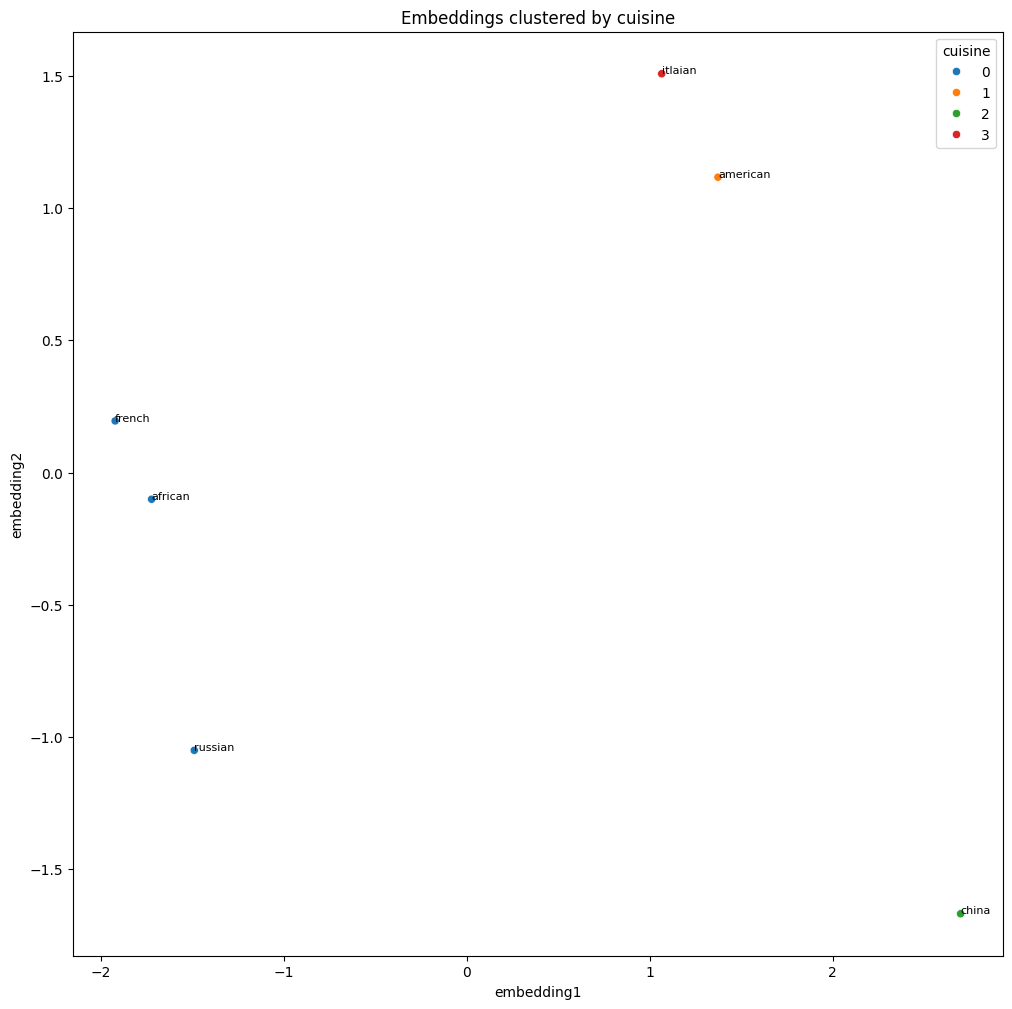

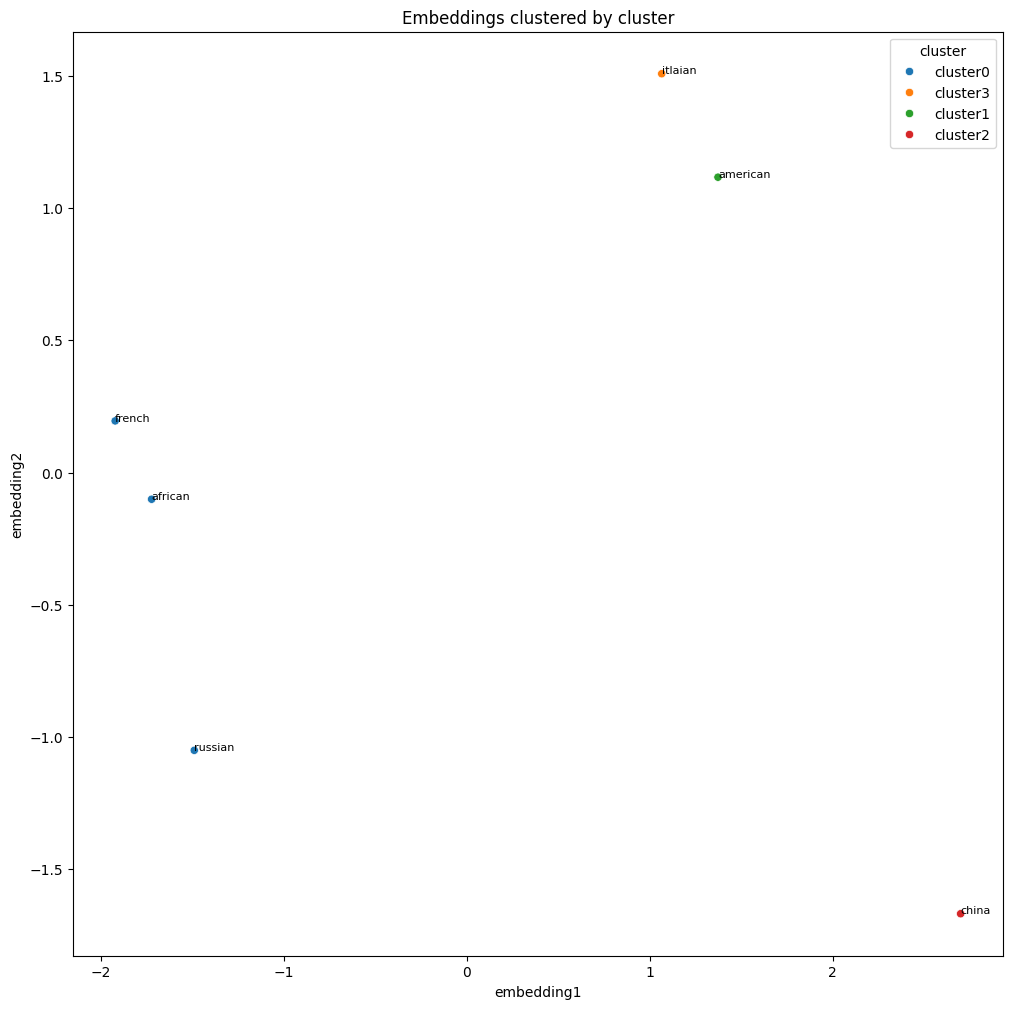

In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from ampligraph.discovery import find_clusters
import matplotlib.pyplot as plt
import seaborn as sns

embeddings_2d = PCA(n_components=2).fit_transform(np.array(list(cuisine_embeddings.values())))
cuisine_array = np.array(cuisine)


# Кластеризация
clustering_algorithm = KMeans(n_clusters=4, n_init=50, max_iter=500, random_state=0)
clusters = find_clusters(cuisine_array, model, clustering_algorithm, mode='e')
print( len(cuisine), embeddings_2d.shape[0],len(clusters))
# Создание DataFrame для визуализации
plot_df = pd.DataFrame({
    "agents": cuisine,
    "embedding1": embeddings_2d[:, 0],
    "embedding2": embeddings_2d[:, 1],
    "cuisine": clusters,
    "cluster": "cluster" + pd.Series(clusters).astype(str)
})

# Визуализация кластеров
def plot_clusters(hue):
    plt.figure(figsize=(12, 12))
    plt.title(f"Embeddings clustered by {hue}".capitalize())
    sns.scatterplot(data=plot_df, x="embedding1", y="embedding2", hue=hue, palette="tab10")
    for _, point in plot_df.iterrows():
        plt.text(point['embedding1'], point['embedding2'], point["agents"], fontsize=8)
    plt.show()

# Визуализация кластеров по кухням и результатам кластеризации
plot_clusters("cuisine")
plot_clusters("cluster")